# Gaussian Blur Convolution With CUDA SpeedUp

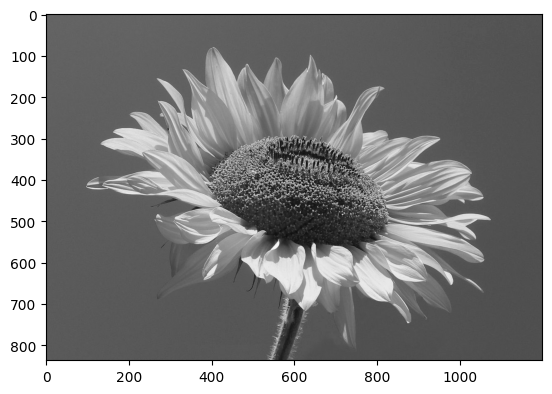

In [2]:
# import necessary libraries and load the test image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil

image = cv2.imread('../data/1200px-Sunflower_from_Silesia2.jpg')
# convert image to 3 channels to single channel
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [3]:
# helper function to create a gaussian kernel with sigma
def gaussian2d(sig=1.0):
    if ceil(6*sig) % 2 != 0:

        filter_size = ceil(6*sig)

    else:

        filter_size = ceil(6*sig) + 1

    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)

    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)


# create a gaussian kernel with sigma=2.5
gaussian_kernel_array = gaussian2d(2.5)
print(gaussian_kernel_array)

[[1.00755667e-05 2.85059647e-05 6.87250219e-05 1.41190967e-04
  2.47179144e-04 3.68747952e-04 4.68770520e-04 5.07813042e-04
  4.68770520e-04 3.68747952e-04 2.47179144e-04 1.41190967e-04
  6.87250219e-05 2.85059647e-05 1.00755667e-05]
 [2.85059647e-05 8.06495603e-05 1.94438001e-04 3.99459887e-04
  6.99323439e-04 1.04326798e-03 1.32625353e-03 1.43671330e-03
  1.32625353e-03 1.04326798e-03 6.99323439e-04 3.99459887e-04
  1.94438001e-04 8.06495603e-05 2.85059647e-05]
 [6.87250219e-05 1.94438001e-04 4.68770520e-04 9.63057725e-04
  1.68599867e-03 2.51521446e-03 3.19746425e-03 3.46377167e-03
  3.19746425e-03 2.51521446e-03 1.68599867e-03 9.63057725e-04
  4.68770520e-04 1.94438001e-04 6.87250219e-05]
 [1.41190967e-04 3.99459887e-04 9.63057725e-04 1.97853777e-03
  3.46377167e-03 5.16734013e-03 6.56897674e-03 7.11608755e-03
  6.56897674e-03 5.16734013e-03 3.46377167e-03 1.97853777e-03
  9.63057725e-04 3.99459887e-04 1.41190967e-04]
 [2.47179144e-04 6.99323439e-04 1.68599867e-03 3.46377167e-03
  

In [4]:
# write img matrix and kernel to a file
with open('gaussian_blur_input.txt', 'w') as f:
    # write kernel size
    f.write(str(len(gaussian_kernel_array)) + ' ' + str(len(gaussian_kernel_array[0])) + '\n')
    for row in gaussian_kernel_array:
        # write kernel values
        f.write(' '.join(map(str, row)) + '\n')
    
    # write image size
    f.write(str(len(gray)) + ' ' + str(len(gray[0])) + '\n')
    for row in gray:
        # write image values
        f.write(' '.join(map(str, row)) + '\n')


## Reading in Non-SpedUp Gaussian Blur

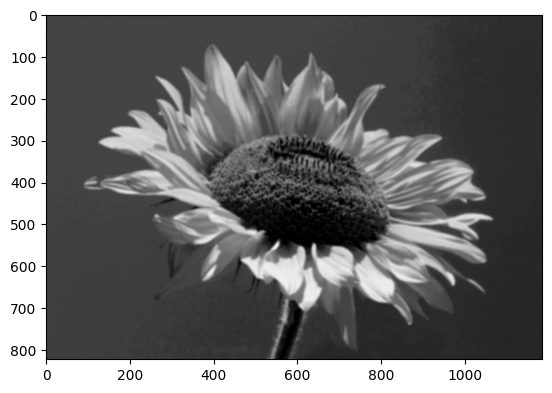

In [10]:
# read the output from the file
output = np.array([])
# first line is the size of the output image
output_size = (0, 0)
with open('gaussian_blur_output.txt', 'r') as f:
    output_size = tuple(map(int, f.readline().split()))
    for _ in range(output_size[0]):
        output = np.append(output, list(map(int, f.readline().split())))

output = output.reshape(output_size)
plt.imshow(output, cmap='gray')
plt.show()



## Reading In the CUDA-Optimized Blur Output

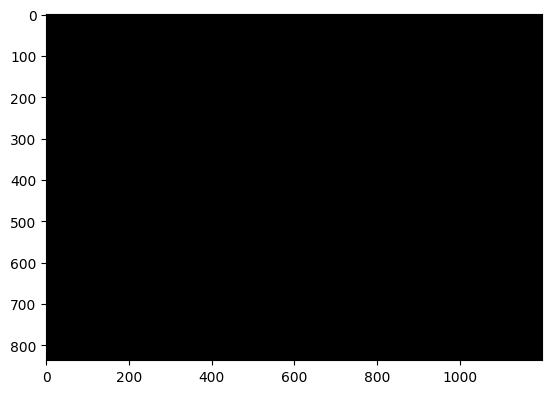

In [9]:
# read the output from the file
output = np.array([])
# first line is the size of the output image
output_size = (0, 0)
with open('gaussian_blur_cuda_output.txt', 'r') as f:
    output_size = tuple(map(int, f.readline().split()))
    for _ in range(output_size[0]):
        output = np.append(output, list(map(int, f.readline().split())))

output = output.reshape(output_size)
plt.imshow(output, cmap='gray')
plt.show()

